## Observations and Insights 

**Observation and Analysis**

1. This analysis was based on 249 mice of which, 49% were female and 51% male mice.


2. We looked at 10 different drung regimens and of the 10, Proprivia had the least number of mice to complete the study while Capomulin and Ramicane had the highiest numbers of mice to complete the study.


3. Based on the analysis,Capomulin and Ramicane seem to be the most effective at reducing the tumor size. We looked at mouse x401 which was treated using the Capomulin drug regimen and noticed that the tumor size was reduced from 45.0mm3 to less than 30.0mm3 in approximately 43 days.


4. There is a strong positive correlation between the mouse weight and the average tumor volume. The correlation is 0.84, which indicates that as the mouse weight increases, there is also an increase in the avarage tumor volume.


In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head


<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [3]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how ="outer")
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].value_counts()
number_of_mice = len(mice_count)
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=pd.DataFrame(duplicate_mice)
duplicate_mouse


,0
0,g989


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
updated_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
updated_count=updated_data["Mouse ID"].value_counts()
second_mice_count=len(updated_count)
second_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
#grp by drug regimen and use the grouped by data to calculate the stats
grpby_regimen = updated_data.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

 # mean calc 
mean_regimen = grpby_regimen["Tumor Volume (mm3)"].mean()

 # median calc median
median_regimen = grpby_regimen["Tumor Volume (mm3)"].median()

 #Variance calc
variance_regimen = grpby_regimen["Tumor Volume (mm3)"].var()

# stan dev calc 
std_regimen = grpby_regimen["Tumor Volume (mm3)"].std()

# SEM dev calc 
sem_regimen = grpby_regimen["Tumor Volume (mm3)"].sem()




In [26]:
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({ "Mean": mean_regimen, 
                              "Median": median_regimen,
                              "Volume": variance_regimen,
                              "Standard Deviation": std_regimen, 
                              "SEM": sem_regimen})
summary_stats

,Mean,Median,Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_ByRegimen = updated_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_ByRegimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements on Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of measurements'>

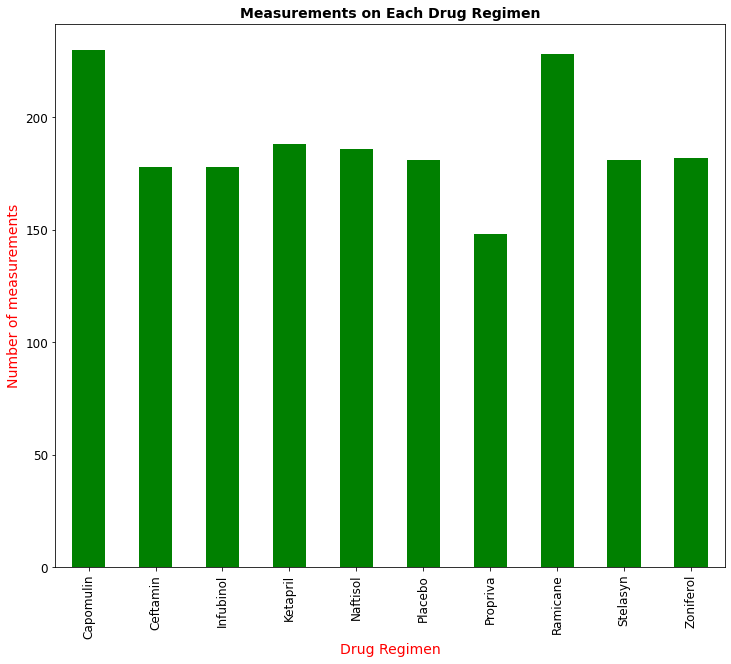

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# need to count the measurements taken  i.e group  the mice by regimen and count
count_measure =  grpby_regimen.count()["Tumor Volume (mm3)"]
count_measure

#plot bar chart
barChart = count_measure.plot.bar(color = 'g', align = "center", figsize =(12,10), fontsize = 12)

#label the axis and  the chart
plt.title("Measurements on Each Drug Regimen",fontweight = "bold", fontsize = 14)
plt.xlabel("Drug Regimen", color = "r", fontsize = 14)
plt.ylabel("Number of measurements", color = "r", fontsize = 14)
barChart

In [100]:
#save barchart
plt.savefig("../Images/Number_of_measurements per drug", bbox_inches = "tight")
#plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [101]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#count the number of measurements for each drug regimen
measurement_list =(merged_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()).tolist()
measurement_list


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

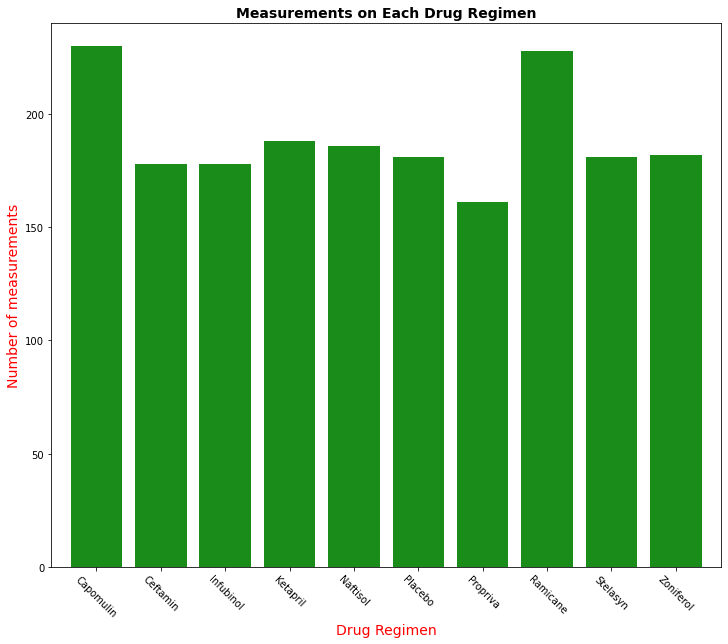

<Figure size 432x288 with 0 Axes>

In [32]:
#set the x-axis to the leangth of the count_measure
x_axis = np.arange(len(count_measure))
#size of the plot
fig1, ax1 = plt.subplots(figsize=(12, 10))

#Plot the bar chart using the count measure as the x-axis and the measurement list as the y-axis
plt.bar(x_axis, measurement_list, color='g', alpha=0.9, align='center')

#for the axis, determine the tick locations and set rotation at 45 for an angle. can use rotaion= "vertical" or rotation=90 to get a vertical labels 
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=-45)

# define the white space around the bars
plt.xlim(-0.70, len(x_axis)-0.30)

plt.ylim(0, max(measurement_list)+10)

#label the axis and the bar chart
plt.title("Measurements on Each Drug Regimen",fontweight = "bold", fontsize = 14)
plt.xlabel("Drug Regimen", color = "r", fontsize = 14)
plt.ylabel("Number of measurements", color = "r", fontsize = 14)


#Display bar chart
plt.show()

#save as a png image
plt.savefig("../Images/measurements_taken_on_each_drug_regime.png", bbox_inches = "tight")

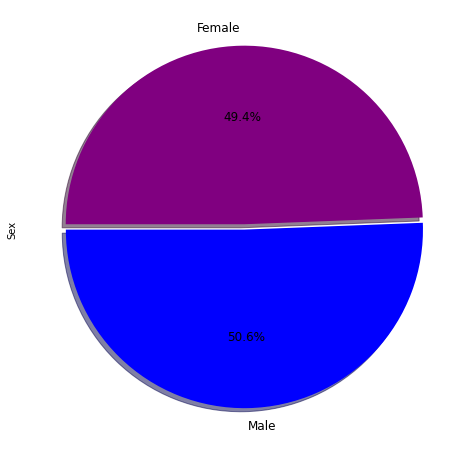

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
 # need to count the gender and get the total number for each gender
    #then we need a % for the 2 genders
#1. Get the number of mice per gender

gender_count = merged_data["Sex"].value_counts()
gender_count

#2. define colors
colors = ["blue","purple"]

#explode the section you want to pop out
explode =(0,0.03)

#plot the pie chart 
gender_count.plot(kind="pie",explode= explode,colors = colors,autopct="%1.1f%%",shadow =True,startangle =180, figsize =(8,10),fontsize = 12)
plt.show()

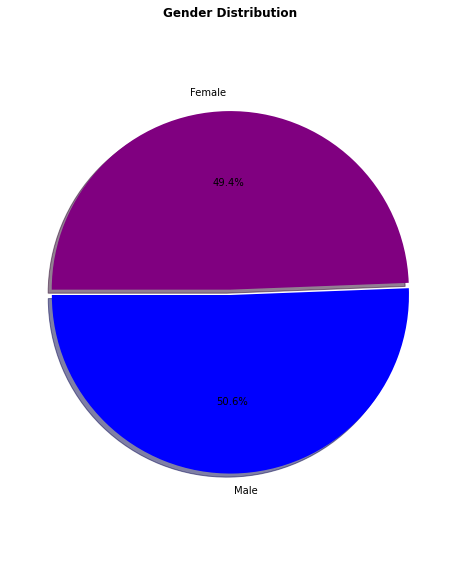

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#1. Get the number of mice per gender
gender_count = merged_data["Sex"].value_counts()
gender_count

#2. define colors
colors = ["blue","purple"]

# Define Labels
labels = ["Male","Female"]

#explode the section you want to pop out
explode =(0,0.03)

#size of the pie
fig1, ax1 = plt.subplots(figsize=(8, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plot the pie chart 
plt.pie(gender_count,explode= explode,colors = colors,autopct="%1.1f%%",shadow =True,startangle =180, labels=labels)

plt.title("Gender Distribution", fontweight="bold",fontsize = 12) 
 # side note-  textprops={'color':"w"} will change the font to white but then makes the labels invisible

#save as a png image
plt.savefig("../Images/gender_distribution.png", bbox_inches = "tight")

## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = pd.DataFrame(merged_data.groupby("Mouse ID")["Timepoint"].max().sort_values(ascending=False)).reset_index().rename(columns={'Timepoint': 'Greatest_Timepoint'})
greatest_tp


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tp_df = pd.merge(merged_data,greatest_tp, on="Mouse ID")
greatest_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each treatment and get the tumor volumes
for treatment in treatments:
    
    treat_data = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"] == treatment]    
    
    # add subset 
    volume_data = treat_data.loc[treat_data["Timepoint"] == treat_data["Greatest_Timepoint"]]
    
    # Create a series that consists of all final volume values for each regimen
    values = volume_data["Tumor Volume (mm3)"]
    treatment_values.append(values)
    
    # Calculate and print the IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(volume_data['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (treat_data['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')
    
    # Determine outliers using upper and lower bounds
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


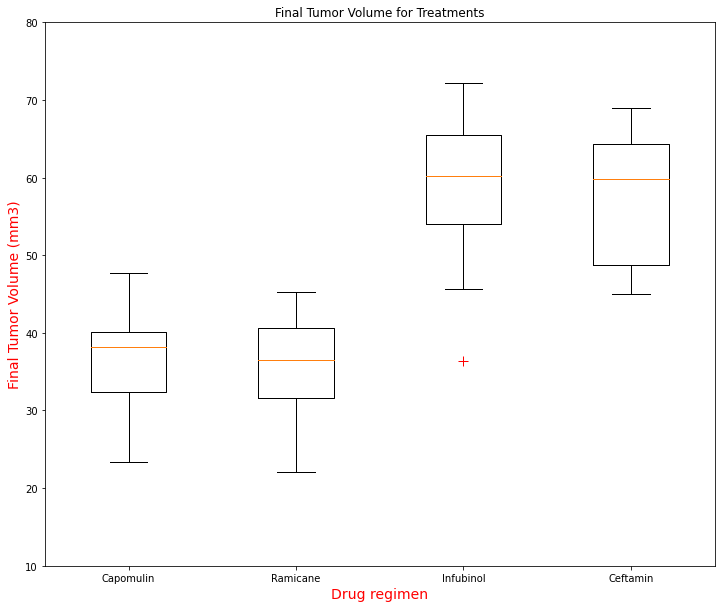

<Figure size 432x288 with 0 Axes>

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot for visibility
flierprops = dict(marker='+', markersize=10, markeredgecolor='red')

# Plot boxplot
plt.figure(figsize=(12,10))
plt.boxplot(treatment_values, flierprops=flierprops)


# Add title and labels to boxplot

plt.title('Final Tumor Volume for Treatments')
plt.ylabel("Final Tumor Volume (mm3)",color = "r", fontsize = 14)
plt.xlabel("Drug regimen",color = "r", fontsize = 14,)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylim(10, 80)
plt.show()

#save as a png image
plt.savefig("../Images/Final_Tumor_Volume_by_Treatment.png", bbox_inches = "tight")

## Line and Scatter Plots

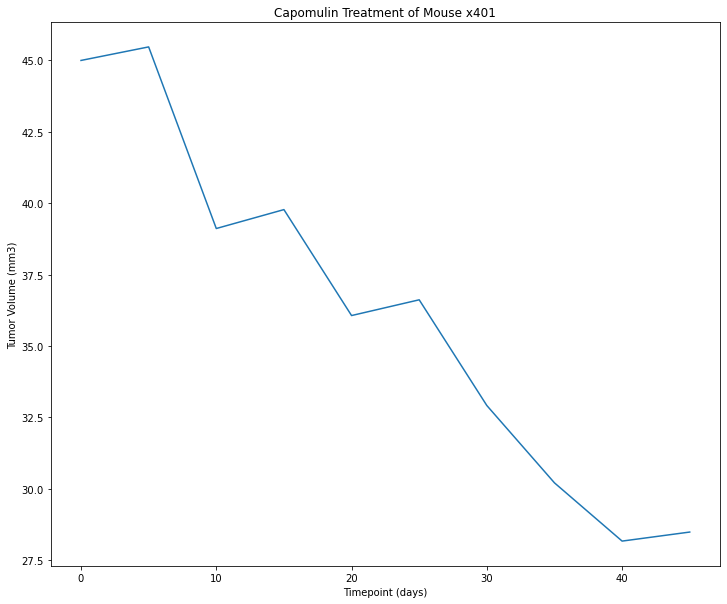

<Figure size 432x288 with 0 Axes>

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinMouse = merged_data.loc[merged_data["Mouse ID"] == "x401",:]
capomulinMouse.head()

#plot
plt.figure(figsize=(12,10))
plt.plot(capomulinMouse['Timepoint'],capomulinMouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse x401')
plt.show()
#save as a png image
plt.savefig("../Images/Capomulin Treatment of Mouse x401.png", bbox_inches = "tight")

<Figure size 864x720 with 0 Axes>

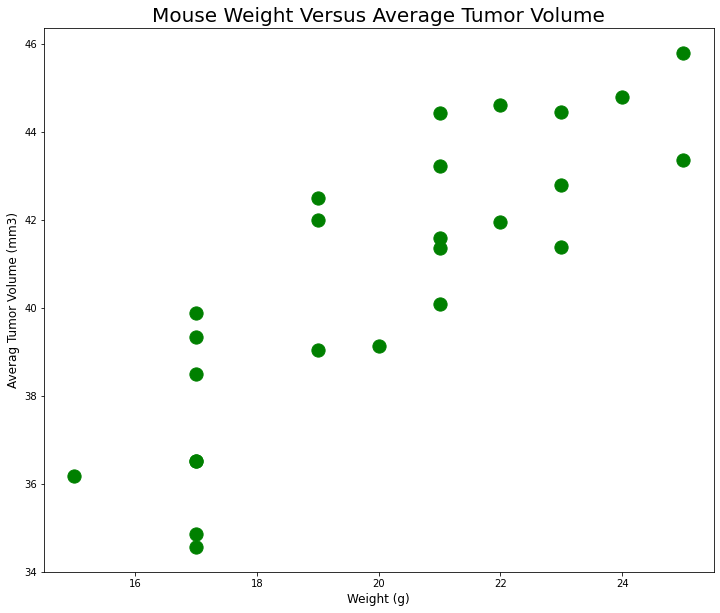

In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.figure(figsize=(12,10))
#create taable for Capomulin
capomulinT= merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"]
#calculate average
avg_capm_vol = capomulinT.groupby(['Mouse ID']).mean()

#plot 
plt.figure(figsize=(12,10))
marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="green")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)


plt.savefig("../Images/capomulin_scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlationCoe=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
correlationCoe

0.84

In [96]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


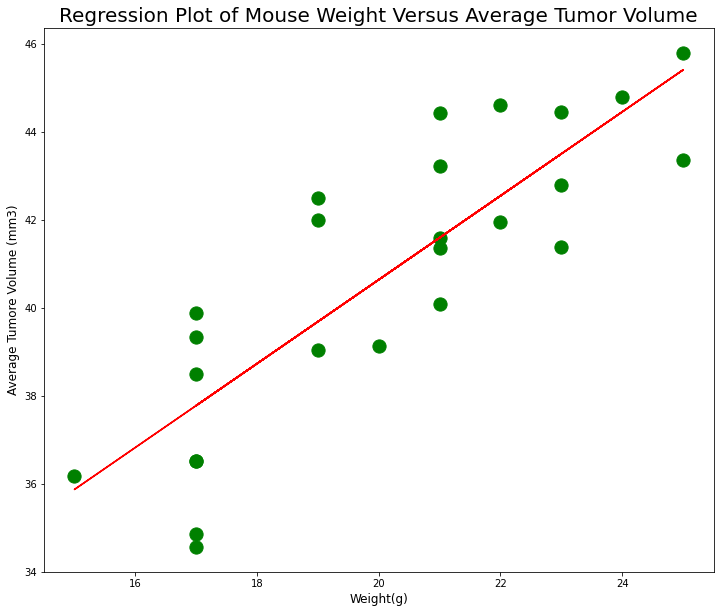

In [97]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(12,10))
plt.scatter(x_values,y_values,s=175, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/Linear_Regression.png", bbox_inches = "tight")
plt.show()